# SCDICIIRegistryAndRe-Comorbidities_DATA_LABELS file

In [2]:
## Loading Necessary Libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re

In [3]:
#reading the data set of SCDICIIRegistryAndRe-Comorbidities_DATA_LABELS_2025-03-24_1940-1.csv
df1 = pd.read_csv('Z:/NEU/ALY 6080 - Integrated Experiential Learning/Data Source/SCDICIIRegistryAndRe-Comorbidities_DATA_LABELS_2025-03-24_1940-1.csv')
df1.shape

(295, 36)

In [4]:
df1.columns

Index(['Subject ID', 'Event Name',
       '24. Avascular necrosis (check all that apply)     [p3f4_txt1]',
       '25. Chronic kidney disease     [p3f4_txt1]',
       '26. End stage renal disease     [p3f4_txt1]',
       '27. Priapism     [p3f4_txt1]',
       '28. Stroke (check all that apply)     [p3f4_txt1]',
       '29. Intracranial bleeding     [p3f4_txt1]',
       '30. Pulmonary arterial hypertension     [p3f4_txt1]',
       '31. Left ventricular dysfunction     [p3f4_txt1]',
       '32. Acute chest syndrome     [p3f4_txt1]',
       '34. Gallstones/cholelithiasis, cholecystitis     [p3f4_txt1]',
       '35. Splenomegaly (check all that apply)     [p3f4_txt1]',
       '36. Deep vein thrombosis (DVT)     [p3f4_txt1]',
       '37. Lupus     [p3f4_txt1]', '39. Gout     [p3f4_txt1]',
       '40. Sarcoidosis     [p3f4_txt1]',
       '41. Multi-organ failure (check all that apply)     [p3f4_txt1]',
       '43. Skin ulcers     [p3f4_txt1]', '44. Retinopathy     [p3f4_txt1]',
       '45. D

In [5]:
# 2. Define a column‐name cleaning function that strips numeric prefixes
#    and removes any parenthesized or bracketed content
def clean_col(name: str) -> str:
    # 2a. Remove leading numeric prefixes like "24. "
    name = re.sub(r'^\d+\.\s*', '', name)
    # 2b. Remove any " (…)" or " […]", including the space before the bracket
    name = re.sub(r'\s*[\(\[].*?[\)\]]', '', name)
    return name.strip()

# 3. Apply the cleaning function
df1.rename(columns=clean_col, inplace=True)

In [6]:
df1.columns

Index(['Subject ID', 'Event Name', 'Avascular necrosis',
       'Chronic kidney disease', 'End stage renal disease', 'Priapism',
       'Stroke', 'Intracranial bleeding', 'Pulmonary arterial hypertension',
       'Left ventricular dysfunction', 'Acute chest syndrome',
       'Gallstones/cholelithiasis, cholecystitis', 'Splenomegaly',
       'Deep vein thrombosis', 'Lupus', 'Gout', 'Sarcoidosis',
       'Multi-organ failure', 'Skin ulcers', 'Retinopathy',
       'Diabetes mellitus', 'Iron overload', 'Chronic refractory pain',
       'Seizure disorder', 'Anxiety', 'Depression',
       'Other psychiatric disorder', 'Other major health condition',
       'Liver cirrhosis', 'Intrahepatic cholelithiasis', 'Hepatitis B',
       'Hepatitis C', 'Hepatic sequestration', 'Hepatomegaly',
       'Bridging fibrosis', ''],
      dtype='object')

In [7]:
#Checking for blank values in percentage
blank_percentage = (df1.apply(lambda x: (x == "").sum()) / len(df1)) * 100
blank_df = blank_percentage[blank_percentage > 0].reset_index()
blank_df.columns = ['Column', 'Blank_Percentage']
blank_df

,Column,Blank_Percentage


In [8]:
# checking for NULL values in Percentage
NA_percentage = (df1.isnull().sum() / len(df1)) * 100
NA_df = NA_percentage[NA_percentage > 0].reset_index()
NA_df.columns = ['Column', 'NA_Percentage']
NA_df

,Column,NA_Percentage
0,Avascular necrosis,1.016949
1,Chronic kidney disease,1.016949
2,End stage renal disease,1.016949
3,Priapism,1.016949
4,Stroke,1.016949
5,Intracranial bleeding,1.016949
6,Pulmonary arterial hypertension,1.016949
7,Left ventricular dysfunction,1.355932
8,Acute chest syndrome,1.016949
9,"Gallstones/cholelithiasis, cholecystitis",1.016949


In [9]:
# Fill missing values with the mode of each column
for col in NA_df['Column']:
    mode_val = df1[col].mode()[0]
    df1[col].fillna(mode_val, inplace=True)

In [10]:
# checking for NULL values in Percentage
NA_percentage = (df1.isnull().sum() / len(df1)) * 100
NA_df = NA_percentage[NA_percentage > 0].reset_index()
NA_df.columns = ['Column', 'NA_Percentage']
NA_df

,Column,NA_Percentage


In [11]:
# Identify SCD complication columns (binary flags: 'Yes'/'No')
comp_cols = [
    col for col in df1.columns 
    if df1[col].nunique(dropna=False) <= 3 and col not in ['Subject ID', 'Event Name']
]

In [12]:
# Compute counts
comp_counts = df1[comp_cols].apply(lambda col: (col == 'Yes').sum())

# Build and display the frequency DataFrame
counts_df = (
    comp_counts.reset_index()
               .rename(columns={'index': 'Complication', 0: 'Count'})
               .sort_values('Count', ascending=False)
)
print(counts_df.to_string(index=False))

                            Complication  Count
                    Acute chest syndrome    140
                      Avascular necrosis    108
                                 Anxiety     94
                           Iron overload     88
                              Depression     82
                    Deep vein thrombosis     62
Gallstones/cholelithiasis, cholecystitis     51
            Other major health condition     50
                             Retinopathy     45
              Other psychiatric disorder     41
                  Chronic kidney disease     34
                                Priapism     27
                                  Stroke     26
                 Chronic refractory pain     23
                       Diabetes mellitus     22
                            Splenomegaly     21
         Pulmonary arterial hypertension     20
                            Hepatomegaly     20
                             Skin ulcers     15
                        Seizure disorder

In [13]:
df1.head()

,Subject ID,Event Name,Avascular necrosis,Chronic kidney disease,End stage renal disease,Priapism,Stroke,Intracranial bleeding,Pulmonary arterial hypertension,Left ventricular dysfunction,Acute chest syndrome,"Gallstones/cholelithiasis, cholecystitis",Splenomegaly,Deep vein thrombosis,Lupus,Gout,Sarcoidosis,Multi-organ failure,Skin ulcers,Retinopathy,Diabetes mellitus,Iron overload,Chronic refractory pain,Seizure disorder,Anxiety,Depression,Other psychiatric disorder,Other major health condition,Liver cirrhosis,Intrahepatic cholelithiasis,Hepatitis B,Hepatitis C,Hepatic sequestration,Hepatomegaly,Bridging fibrosis,
0,MSC0001,Year 1,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,No
1,MSC0002,Year 1,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No
2,MSC0004,Year 1,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No
3,MSC0005,Year 1,No,Yes,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No
4,MSC0007,Year 1,No,No,No,No,Yes,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,Yes,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No


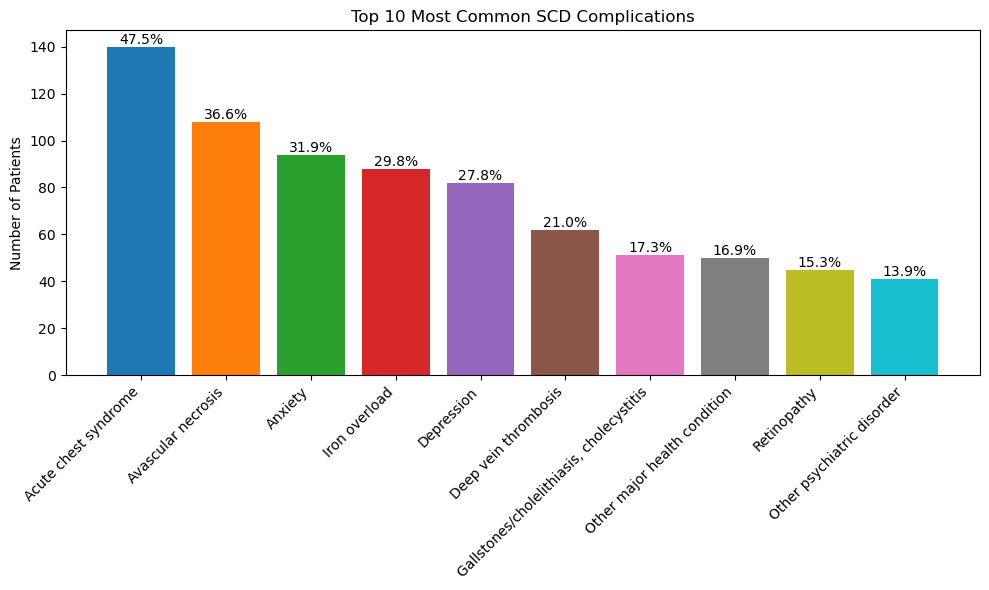

In [14]:
import matplotlib.pyplot as plt

# 1. Prepare the top 10 DataFrame with percentages
top10 = counts_df.head(10).copy()
top10['Percent'] = top10['Count'] / len(df1) * 100

# 2. Choose a qualitative colormap and generate distinct colors
cmap = plt.get_cmap('tab10')            # 'tab10' provides up to 10 distinct colors
colors = [cmap(i) for i in range(len(top10))]

# 3. Plot bars with distinct colors
plt.figure(figsize=(10, 6))
bars = plt.bar(top10['Complication'], top10['Count'], color=colors)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Patients')
plt.title('Top 10 Most Common SCD Complications')

# 4. Annotate each bar with its percentage
for bar, pct in zip(bars, top10['Percent']):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{pct:.1f}%",
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()


In [15]:
# Get a list of the top 10 complication names
top10_complications = counts_df['Complication'].head(10).tolist()

print(top10_complications)

['Acute chest syndrome', 'Avascular necrosis', 'Anxiety', 'Iron overload', 'Depression', 'Deep vein thrombosis', 'Gallstones/cholelithiasis, cholecystitis', 'Other major health condition', 'Retinopathy', 'Other psychiatric disorder']


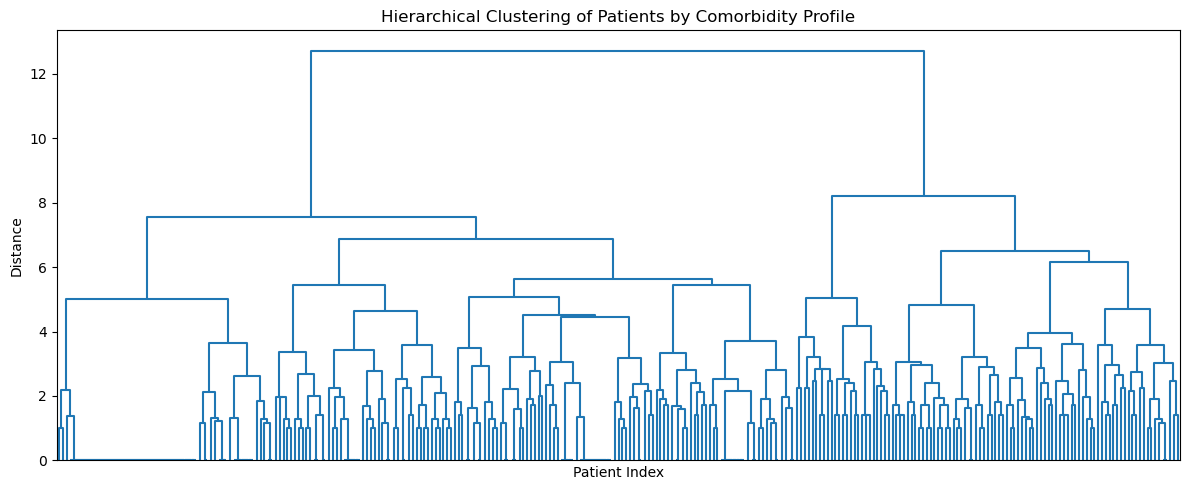

In [16]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# 1. Create a binary matrix of complications (1 = Yes, 0 = No)
#    Make sure comp_cols is the list of your complication column names
bin_df = df1[comp_cols].eq('Yes').astype(int)

# 2. Perform hierarchical clustering (Ward’s method)
Z = linkage(bin_df, method='ward')

# 3. Plot the dendrogram
plt.figure(figsize=(12, 5))
dendrogram(
    Z,
    no_labels=True,        # hide individual patient labels
    color_threshold=0      # draw all links in same color
)
plt.title('Hierarchical Clustering of Patients by Comorbidity Profile')
plt.xlabel('Patient Index')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()


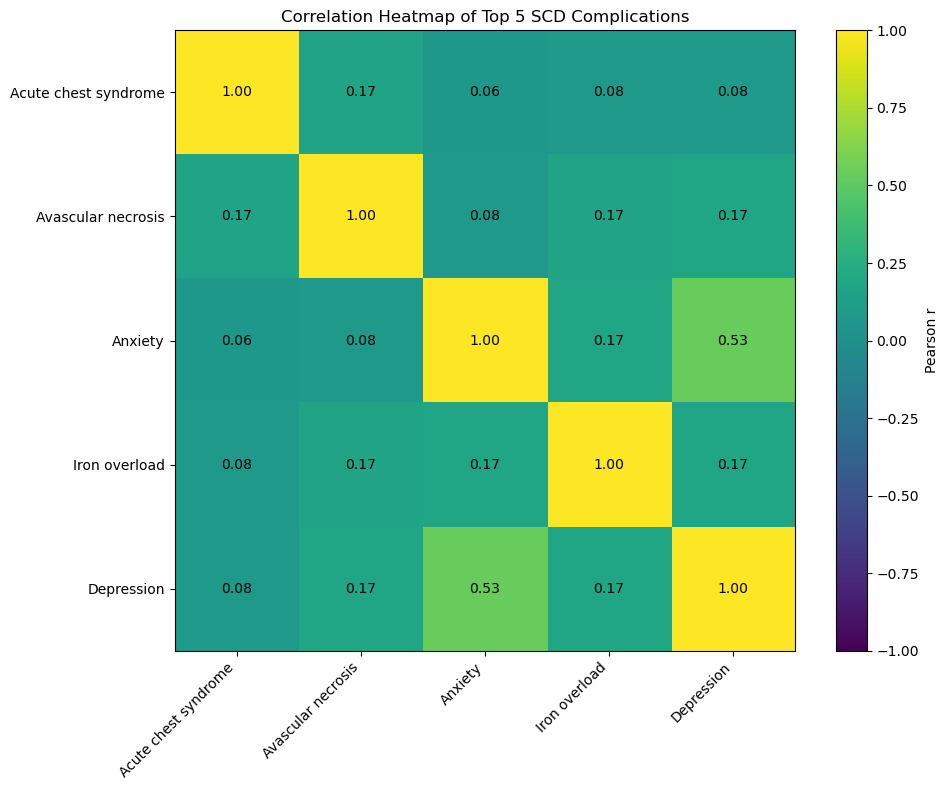

In [17]:
import matplotlib.pyplot as plt

# 1. Create binary matrix if not already defined
bin_df = df1[comp_cols].eq('Yes').astype(int)

# 2. Select the top 5 most common complications
top5 = counts_df.head(5)['Complication'].tolist()

# 3. Compute the correlation matrix for those top 5
corr_top5 = bin_df[top5].corr()

# 4. Plot the heatmap with annotations
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(corr_top5.values, vmin=-1, vmax=1)

# 5. Add colorbar
cbar = fig.colorbar(im, ax=ax, label='Pearson r')

# 6. Set tick labels
ax.set_xticks(range(len(top5)))
ax.set_xticklabels(top5, rotation=45, ha='right')
ax.set_yticks(range(len(top5)))
ax.set_yticklabels(top5)

# 7. Annotate each cell with its correlation coefficient
for i in range(len(top5)):
    for j in range(len(top5)):
        coeff = corr_top5.values[i, j]
        ax.text(j, i, f"{coeff:.2f}", ha='center', va='center')

# 8. Title and layout
ax.set_title('Correlation Heatmap of Top 5 SCD Complications')
plt.tight_layout()
plt.show()


# Transfusions file

In [19]:
#reading the data set of MUSC REAL Acute Care Transfusions.xlsx
df2 = pd.read_excel('Z:/NEU/ALY 6080 - Integrated Experiential Learning/Data Source/MUSC REAL Acute Care Transfusions.xlsx')
df2.shape

(156, 3002)

In [20]:
# 2. Rename key columns for clarity
df2.rename(columns={
    'subject_id': 'SubjectID',
    'transfusion_statusdt': 'TransfusionDate'
}, inplace=True)

In [21]:
# 3. Identify all the transfusion‐type columns
type_cols = [c for c in df2.columns if c.startswith('transfusion_type')]


In [22]:
# 4. Pivot to long form so each row is one transfusion event
df_long = df2.melt(
    id_vars=['SubjectID', 'TransfusionDate'],
    value_vars=type_cols,
    var_name='TypeField',
    value_name='TransfusionType'
)

In [23]:
# 5. Drop rows where no transfusion was recorded
df_long = df_long.dropna(subset=['TransfusionType'])

In [24]:
# 6. Extract the event number from the original column name
df_long['EventNumber'] = (
    df_long['TypeField']
      .str.extract(r'transfusion_type(\d+)')
      .astype(int)
)


In [25]:
# 7. Preview the tidy table
print(df_long[['SubjectID','TransfusionDate','EventNumber','TransfusionType']].head())

  SubjectID TransfusionDate  EventNumber  TransfusionType
0   MSC0001      2024-12-23            1              1.0
1   MSC0002      2024-09-25            1              1.0
2   MSC0005      2023-04-28            1              2.0
3   MSC0010      2024-09-26            1              2.0
4   MSC0011      2024-12-20            1              2.0


In [26]:
# 8. (Optional) See all unique transfusion types and their counts
print("\nUnique transfusion types:")
print(df_long['TransfusionType'].unique())

print("\nCounts per transfusion type:")
print(df_long['TransfusionType'].value_counts())


Unique transfusion types:
[1. 2.]

Counts per transfusion type:
TransfusionType
2.0    126
1.0     94
Name: count, dtype: int64


In [27]:
# count all non-null transfusion entries in the wide df
original_event_count = df2[type_cols].notna().sum().sum()
long_event_count     = len(df_long)
print(original_event_count, long_event_count)

220 220


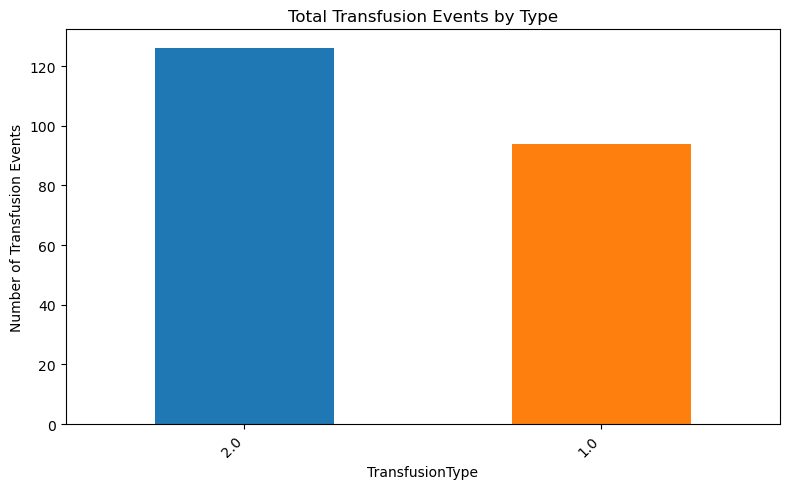

In [28]:
# 1. Compute counts by type
type_counts = df_long['TransfusionType'].value_counts()

# 2. Get distinct colors from the 'tab10' colormap
cmap = plt.get_cmap('tab10')
colors = cmap.colors[:len(type_counts)]  # grab as many colors as there are types

# 3. Plot with a list of colors rather than the string 'tab10'
plt.figure(figsize=(8,5))
type_counts.plot.bar(color=colors)           # pass the list of RGBA tuples
plt.xticks(rotation=45, ha='right')          # now explicitly set xticks
plt.ylabel('Number of Transfusion Events')
plt.title('Total Transfusion Events by Type')
plt.tight_layout()
plt.show()

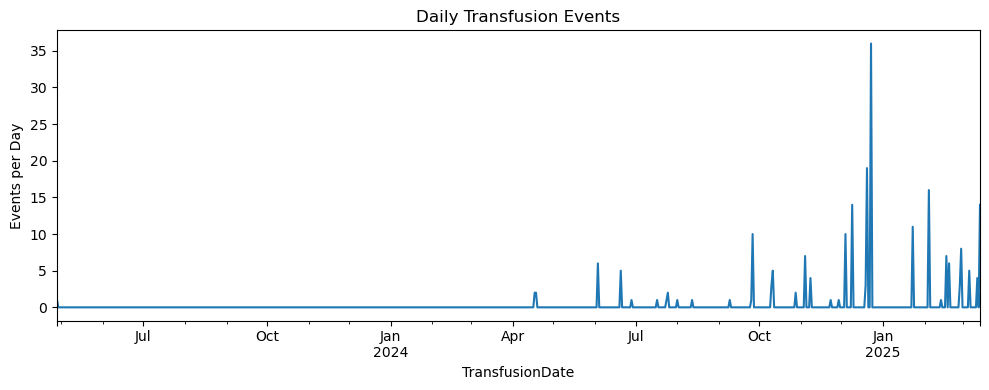

In [29]:
# ensure datetime
df_long['TransfusionDate'] = pd.to_datetime(df_long['TransfusionDate'])

# daily counts
daily = df_long.set_index('TransfusionDate').groupby(pd.Grouper(freq='D')).size()

plt.figure(figsize=(10,4))
daily.plot()
plt.ylabel('Events per Day')
plt.title('Daily Transfusion Events')
plt.tight_layout()
plt.show()

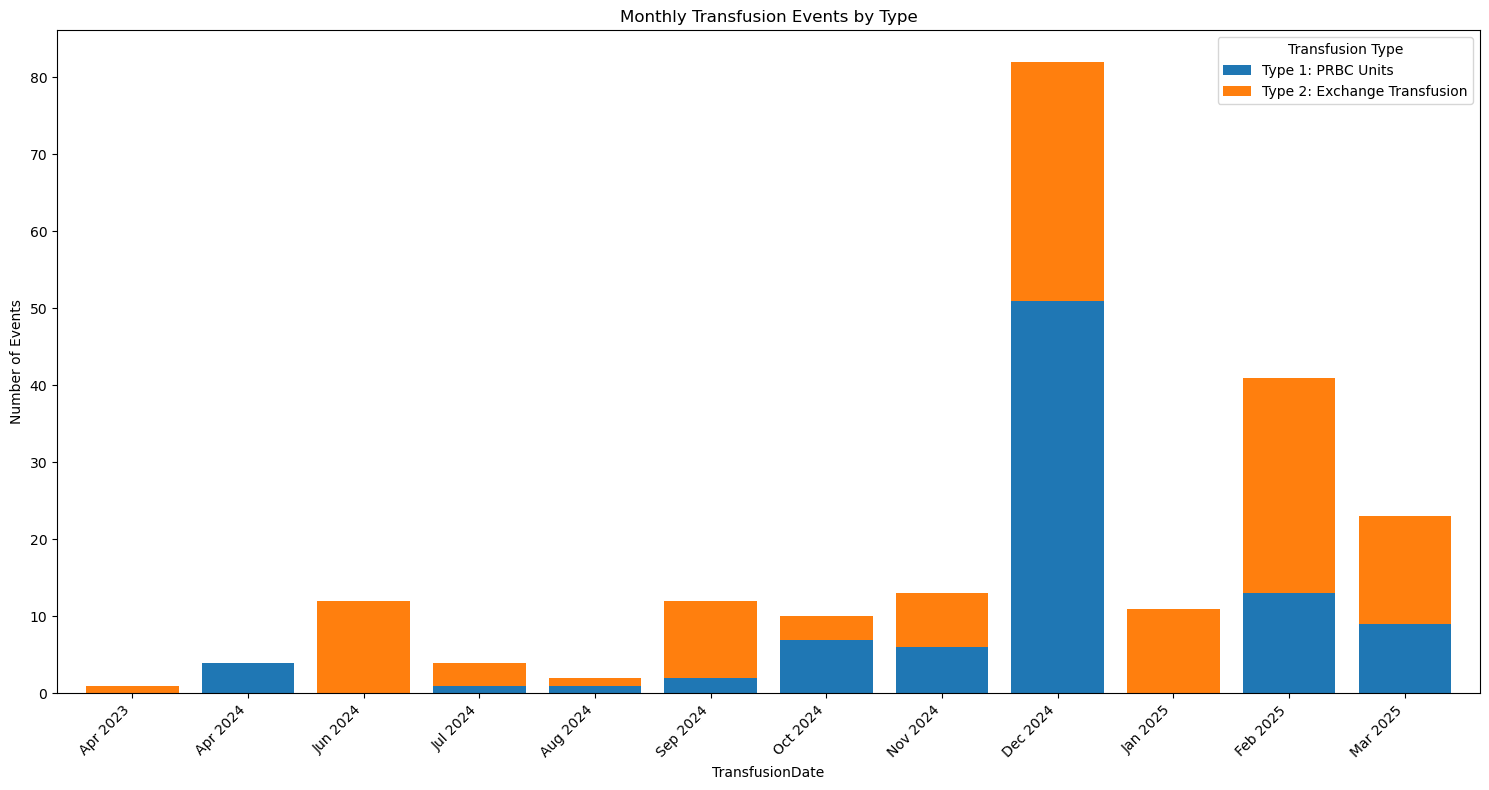

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Ensure TransfusionDate is datetime
df_long['TransfusionDate'] = pd.to_datetime(df_long['TransfusionDate'])

# 2. Map numeric codes to human‐readable labels
type_mapping = {
    1.0: 'Type 1: PRBC Units',
    2.0: 'Type 2: Exchange Transfusion'
}
df_long['TransfusionTypeLabel'] = df_long['TransfusionType'].map(type_mapping)

# 3. Aggregate by month and labeled type
monthly_type = (
    df_long
    .set_index('TransfusionDate')
    .groupby([pd.Grouper(freq='M'), 'TransfusionTypeLabel'])
    .size()
    .unstack(fill_value=0)
)

# 4. Convert the datetime index to formatted strings for the x‐axis
monthly_type.index = monthly_type.index.strftime('%b %Y')

# 5. Plot stacked bar chart
ax = monthly_type.plot(
    kind='bar',
    stacked=True,
    width=0.8,
    figsize=(15, 8)
)

plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Events')
plt.title('Monthly Transfusion Events by Type')
plt.legend(title='Transfusion Type', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


# Registration form file & Demographic file

In [32]:
# Load Registration (demographics & baseline)
df3 = pd.read_excel('Z:/NEU/ALY 6080 - Integrated Experiential Learning/Data Source/SCD Data Retro/RegistrationForm.xlsx')
df3.shape

(1367, 23)

In [33]:
df3.columns

Index(['Subject ID', 'Event Name',
       '1b.  Date Real Answers consent form signed',
       ' (choice=Check if subject is a minor and provided signed Assent)',
       '1c.  Permission to share specimens', '1d.  Permission to share data',
       '1a.  Date SCDIC II Registry consent form signed',
       ' (choice=Check if subject is a minor and provided signed Assent).1',
       'Is the subject a new participant in the SCDIC I Registry?',
       '2. Date of birth',
       '3. Race (check all that apply) (choice=American Indian or Alaska Native)',
       '3. Race (check all that apply) (choice=Asian)',
       '3. Race (check all that apply) (choice=Black or African American)',
       '3. Race (check all that apply) (choice=Native Hawaiian or Pacific Islander)',
       '3. Race (check all that apply) (choice=White)',
       '3. Race (check all that apply) (choice=Other)',
       '3. Race (check all that apply) (choice=Not Available)',
       '4. Ethnicity (check one)', '5. Sex',
       

In [34]:
# Keep only the specified columns in df3
relevant_cols = [
    'Subject ID',
    '2. Date of birth',
    '5. Sex',
    '6. Zip code of primary residence',
    'Consent Date'
]

df3 = df3[relevant_cols].copy()

# Verify
print(df3.head())
print("Remaining columns:", df3.columns.tolist())

  Subject ID 2. Date of birth  5. Sex 6. Zip code of primary residence  \
0    MSC0001       1977-01-10    Male                            29403   
1    MSC0001              NaN     NaN                              NaN   
2    MSC0001              NaN     NaN                              NaN   
3    MSC0001              NaN     NaN                              NaN   
4    MSC0002       1985-05-15  Female                            29479   

  Consent Date  
0   2022-12-21  
1          NaN  
2          NaN  
3          NaN  
4   2023-09-18  
Remaining columns: ['Subject ID', '2. Date of birth', '5. Sex', '6. Zip code of primary residence', 'Consent Date']


In [35]:
# Renaming to a meaningful names
rename_dict = {
    '2. Date of birth': 'Date of Birth',
    '5. Sex': 'Sex',
    '6. Zip code of primary residence': 'Zip code'
}

# Rename the columns
df3.rename(columns=rename_dict, inplace=True)

# Verify the new column names
print(df3.columns.tolist())


['Subject ID', 'Date of Birth', 'Sex', 'Zip code', 'Consent Date']


In [36]:
df3.shape

(1367, 5)

In [37]:
#Checking for blank values in percentage
blank_percentage = (df3.apply(lambda x: (x == "").sum()) / len(df3)) * 100
blank_df = blank_percentage[blank_percentage > 0].reset_index()
blank_df.columns = ['Column', 'Blank_Percentage']
blank_df

,Column,Blank_Percentage


In [38]:
# checking for NULL values in Percentage
NA_percentage = (df3.isnull().sum() / len(df3)) * 100
NA_df = NA_percentage[NA_percentage > 0].reset_index()
NA_df.columns = ['Column', 'NA_Percentage']
NA_df

,Column,NA_Percentage
0,Date of Birth,77.688369
1,Sex,77.688369
2,Zip code,77.688369
3,Consent Date,78.785662


In [39]:
# Remove duplicates so there’s exactly one row per subject_id,
# keeping the first occurrence of each field
df3 = df3.groupby('Subject ID', as_index=False).agg({
    'Date of Birth': 'first',
    'Sex': 'first',
    'Zip code': 'first',
    'Consent Date': 'first'
})

# Verify the result
print(df3.shape)        # should be (number_of_unique_subjects, 5)
print(df3.head())

(306, 5)
  Subject ID Date of Birth     Sex Zip code Consent Date
0    MSC0001    1977-01-10    Male    29403   2022-12-21
1    MSC0002    1985-05-15  Female    29479   2023-09-18
2    MSC0004    1992-11-25  Female    29485   2022-12-09
3    MSC0005    1998-06-30  Female    27514   2023-03-30
4    MSC0007    1985-02-06    Male    29585         None


In [40]:
#Checking for blank values in percentage
blank_percentage = (df3.apply(lambda x: (x == "").sum()) / len(df3)) * 100
blank_df = blank_percentage[blank_percentage > 0].reset_index()
blank_df.columns = ['Column', 'Blank_Percentage']
blank_df

,Column,Blank_Percentage


In [41]:
# checking for NULL values in Percentage
NA_percentage = (df3.isnull().sum() / len(df3)) * 100
NA_df = NA_percentage[NA_percentage > 0].reset_index()
NA_df.columns = ['Column', 'NA_Percentage']
NA_df

,Column,NA_Percentage
0,Date of Birth,0.326797
1,Sex,0.326797
2,Zip code,0.326797
3,Consent Date,5.228758


In [42]:
df3.head()

,Subject ID,Date of Birth,Sex,Zip code,Consent Date
0,MSC0001,1977-01-10,Male,29403,2022-12-21
1,MSC0002,1985-05-15,Female,29479,2023-09-18
2,MSC0004,1992-11-25,Female,29485,2022-12-09
3,MSC0005,1998-06-30,Female,27514,2023-03-30
4,MSC0007,1985-02-06,Male,29585,None


In [43]:
# Ensure date_of_birth is datetime
df3['Date of Birth'] = pd.to_datetime(df3['Date of Birth'], errors='coerce')

# Reference date for age calculation (today)
today = pd.Timestamp('today')

# Function to compute age
def calculate_age(dob, ref_date=today):
    return ref_date.year - dob.year - ((ref_date.month, ref_date.day) < (dob.month, dob.day))

# Add age column
df3['Age'] = df3['Date of Birth'].apply(calculate_age)

# Convert the age column to integer dtype
df3['Age'] = df3['Age'].astype('Int64')

# Verify
df3.head()

,Subject ID,Date of Birth,Sex,Zip code,Consent Date,Age
0,MSC0001,1977-01-10,Male,29403,2022-12-21,48
1,MSC0002,1985-05-15,Female,29479,2023-09-18,40
2,MSC0004,1992-11-25,Female,29485,2022-12-09,32
3,MSC0005,1998-06-30,Female,27514,2023-03-30,26
4,MSC0007,1985-02-06,Male,29585,None,40


In [44]:
# age bins and labels
bins = [0, 18, 35, 55, 75, 120] 
labels = ['0–18', '19–35', '36–55', '56–75', '76+']

# Create the categorical column
df3['Age Group'] = pd.cut(
    df3['Age'], 
    bins=bins, 
    labels=labels, 
    right=True,      # include the right edge in each bin
    include_lowest=True
)
df3.head()

,Subject ID,Date of Birth,Sex,Zip code,Consent Date,Age,Age Group
0,MSC0001,1977-01-10,Male,29403,2022-12-21,48,36–55
1,MSC0002,1985-05-15,Female,29479,2023-09-18,40,36–55
2,MSC0004,1992-11-25,Female,29485,2022-12-09,32,19–35
3,MSC0005,1998-06-30,Female,27514,2023-03-30,26,19–35
4,MSC0007,1985-02-06,Male,29585,None,40,36–55


In [45]:
# 1. Load the demographics report (adjust path if needed)
demographics = pd.read_excel(
    'Z:/NEU/ALY 6080 - Integrated Experiential Learning/Data Source/SCD Data Retro/Analysis 1 Demographics_Report.xlsx', sheet_name='Age_Statistics')

# 2. Select only the Subject ID and State columns
demographics_sel = demographics[['Subject_ID', 'State']].copy()

# 3. Ensure Subject ID’s have the same dtype/format in both DataFrames
df3['Subject ID']            = df3['Subject ID'].astype(str)
demographics_sel['Subject_ID'] = demographics_sel['Subject_ID'].astype(str)

# 4. Merge the State into df3 by matching Subject ID
df3 = df3.merge(
    demographics_sel,
    left_on='Subject ID',
    right_on='Subject_ID',
    how='left'
)

# 6. Verify the merge
df3.head()


,Subject ID,Date of Birth,Sex,Zip code,Consent Date,Age,Age Group,Subject_ID,State
0,MSC0001,1977-01-10,Male,29403,2022-12-21,48,36–55,MSC0001,SC
1,MSC0002,1985-05-15,Female,29479,2023-09-18,40,36–55,MSC0002,SC
2,MSC0004,1992-11-25,Female,29485,2022-12-09,32,19–35,MSC0004,SC
3,MSC0005,1998-06-30,Female,27514,2023-03-30,26,19–35,MSC0005,NC
4,MSC0007,1985-02-06,Male,29585,None,40,36–55,MSC0007,SC


In [46]:
# 5. Delete the extra key column "Subject_ID"
df3.drop(columns=['Subject_ID'], inplace=True)

# 6. Verify the result
df3.head()

,Subject ID,Date of Birth,Sex,Zip code,Consent Date,Age,Age Group,State
0,MSC0001,1977-01-10,Male,29403,2022-12-21,48,36–55,SC
1,MSC0002,1985-05-15,Female,29479,2023-09-18,40,36–55,SC
2,MSC0004,1992-11-25,Female,29485,2022-12-09,32,19–35,SC
3,MSC0005,1998-06-30,Female,27514,2023-03-30,26,19–35,NC
4,MSC0007,1985-02-06,Male,29585,None,40,36–55,SC


In [47]:
# Ensure the consent_date_generic column is in datetime format
df3['Consent Date'] = pd.to_datetime(df3['Consent Date'], errors='coerce')

# Compute min and max consent dates
min_consent = df3['Consent Date'].min()
max_consent = df3['Consent Date'].max()

print(f"Minimum consent date: {min_consent}")
print(f"Maximum consent date: {max_consent}")

Minimum consent date: 2022-10-17 00:00:00
Maximum consent date: 2024-08-12 00:00:00


# NOAA weather dataset

In [49]:
#reading the data set
df4 = pd.read_csv('Z:/NEU/ALY 6080 - Integrated Experiential Learning/Data Source/NOAA Dataset SC.csv')
df4.shape

(652, 12)

In [50]:
df4.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,USR0000SANP,"ANDREW PICKENS SOUTH CAROLINA, SC US",34.8117,-83.125,487.7,10/16/2022,65,",,U",77,"H,,U",56,"H,,U"
1,USR0000SANP,"ANDREW PICKENS SOUTH CAROLINA, SC US",34.8117,-83.125,487.7,10/17/2022,62,",,U",71,"H,,U",48,"H,,U"
2,USR0000SANP,"ANDREW PICKENS SOUTH CAROLINA, SC US",34.8117,-83.125,487.7,10/18/2022,42,",,U",51,"H,,U",35,"H,,U"
3,USR0000SANP,"ANDREW PICKENS SOUTH CAROLINA, SC US",34.8117,-83.125,487.7,10/19/2022,45,",,U",57,"H,,U",32,"H,,U"
4,USR0000SANP,"ANDREW PICKENS SOUTH CAROLINA, SC US",34.8117,-83.125,487.7,10/20/2022,48,",,U",59,"H,,U",39,"H,,U"


In [51]:
# 1. Parse the date columns as datetime
df3['Consent Date'] = pd.to_datetime(df3['Consent Date'], errors='coerce')
df4['DATE']        = pd.to_datetime(df4['DATE'], errors='coerce')

In [52]:
# 2. Identify which dates are duplicated
dup_counts = df4['DATE'].value_counts()
duplicates = dup_counts[dup_counts > 1]

# 3. Print out the dates that appear more than once and how many times
print("Dates with more than one record:")
print(duplicates)

Dates with more than one record:
Series([], Name: count, dtype: int64)


In [53]:
# 2. Perform a left join so you keep all 306 rows from df3
df5 = pd.merge(
    df3,
    df4,
    left_on='Consent Date',
    right_on='DATE',
    how='left'
)

# 3. Verify you still have 306 rows
print("Rows in df3:", df3.shape[0])
print("Rows in df5:", df5.shape[0])
df5.head()

Rows in df3: 306
Rows in df5: 306


,Subject ID,Date of Birth,Sex,Zip code,Consent Date,Age,Age Group,State,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,MSC0001,1977-01-10,Male,29403,2022-12-21,48,36–55,SC,USR0000SANP,"ANDREW PICKENS SOUTH CAROLINA, SC US",34.8117,-83.125,487.7,2022-12-21,41.0,",,U",47.0,"H,,U",37.0,"H,,U"
1,MSC0002,1985-05-15,Female,29479,2023-09-18,40,36–55,SC,USR0000SANP,"ANDREW PICKENS SOUTH CAROLINA, SC US",34.8117,-83.125,487.7,2023-09-18,66.0,",,U",76.0,"H,,U",57.0,"H,,U"
2,MSC0004,1992-11-25,Female,29485,2022-12-09,32,19–35,SC,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
3,MSC0005,1998-06-30,Female,27514,2023-03-30,26,19–35,NC,USR0000SANP,"ANDREW PICKENS SOUTH CAROLINA, SC US",34.8117,-83.125,487.7,2023-03-30,56.0,",,U",68.0,"H,,U",43.0,"H,,U"
4,MSC0007,1985-02-06,Male,29585,NaT,40,36–55,SC,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
# 5. Delete the extra key column "Subject_ID"
df5.drop(columns=['STATION','NAME','DATE','TAVG_ATTRIBUTES','TMAX_ATTRIBUTES','TMIN_ATTRIBUTES'], inplace=True)

# 6. Verify the result
df5.head()

,Subject ID,Date of Birth,Sex,Zip code,Consent Date,Age,Age Group,State,LATITUDE,LONGITUDE,ELEVATION,TAVG,TMAX,TMIN
0,MSC0001,1977-01-10,Male,29403,2022-12-21,48,36–55,SC,34.8117,-83.125,487.7,41.0,47.0,37.0
1,MSC0002,1985-05-15,Female,29479,2023-09-18,40,36–55,SC,34.8117,-83.125,487.7,66.0,76.0,57.0
2,MSC0004,1992-11-25,Female,29485,2022-12-09,32,19–35,SC,NaN,NaN,NaN,NaN,NaN,NaN
3,MSC0005,1998-06-30,Female,27514,2023-03-30,26,19–35,NC,34.8117,-83.125,487.7,56.0,68.0,43.0
4,MSC0007,1985-02-06,Male,29585,NaT,40,36–55,SC,NaN,NaN,NaN,NaN,NaN,NaN


# Merging Last df5 with df1 (SCDICIIRegistryAndRe-Comorbidities)

In [56]:
# 1. Ensure 'Subject ID' is the same dtype in both dataframes
df1['Subject ID'] = df1['Subject ID'].astype(str)
df5['Subject ID'] = df5['Subject ID'].astype(str)

# 2. Specify the complication columns you want to bring in
complication_cols = [
    'Acute chest syndrome',
    'Avascular necrosis',
    'Anxiety',
    'Iron overload',
    'Depression',
    'Deep vein thrombosis',
    'Gallstones/cholelithiasis, cholecystitis',
    'Other major health condition',
    'Retinopathy',
    'Other psychiatric disorder'
]

# 3. Create a subset of df1 with only Subject ID + those complications
df1_subset = df1[['Subject ID'] + complication_cols].copy()

# 4. Merge df5 with that subset on Subject ID (left join keeps all df5 rows)
df5 = pd.merge(
    df5,
    df1_subset,
    on='Subject ID',
    how='left'
)

# 5. Verify
df5.shape
df5.head()


,Subject ID,Date of Birth,Sex,Zip code,Consent Date,Age,Age Group,State,LATITUDE,LONGITUDE,ELEVATION,TAVG,TMAX,TMIN,Acute chest syndrome,Avascular necrosis,Anxiety,Iron overload,Depression,Deep vein thrombosis,"Gallstones/cholelithiasis, cholecystitis",Other major health condition,Retinopathy,Other psychiatric disorder
0,MSC0001,1977-01-10,Male,29403,2022-12-21,48,36–55,SC,34.8117,-83.125,487.7,41.0,47.0,37.0,No,No,Yes,Yes,Yes,No,No,No,No,No
1,MSC0002,1985-05-15,Female,29479,2023-09-18,40,36–55,SC,34.8117,-83.125,487.7,66.0,76.0,57.0,Yes,No,No,No,No,No,No,Yes,No,No
2,MSC0004,1992-11-25,Female,29485,2022-12-09,32,19–35,SC,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,Yes,No,No,No,No,No
3,MSC0005,1998-06-30,Female,27514,2023-03-30,26,19–35,NC,34.8117,-83.125,487.7,56.0,68.0,43.0,Yes,No,No,Yes,No,No,No,Yes,No,No
4,MSC0007,1985-02-06,Male,29585,NaT,40,36–55,SC,NaN,NaN,NaN,NaN,NaN,NaN,No,No,Yes,Yes,No,Yes,No,No,No,No


# Patient Survey file

In [58]:
# Load Registration (demographics & baseline)
df6 = pd.read_excel('Z:/NEU/ALY 6080 - Integrated Experiential Learning/Data Source/SCD Data Retro/PatientSurveyYear1_2024-12-19_1951.xlsx')
df6.shape

(295, 305)

In [59]:
df6.head()

,Subject ID,Event Name,The patient has opted out of taking this survey (choice=),What is today's date?,1a. What is your year of birth?,2a. How old are you today?,3a. Do you consider yourself Hispanic/Latine or not Hispanic/Latine?,4a.\tWhich of the following five racial designations best describes you?,5a.\tWhat is your current marital status?,6a.\tWhat is your approximate yearly household income? Include income from all sources.,7a.\tWhat is the highest grade or level of school you have completed or the highest degree you have received?,"8a.\tWe would like to know about what you do -- are you working, looking for work, retired, keeping house, or what?",Other reason not listed above,9a. How old were you when you were diagnosed with sickle cell disease?,10a. What type of healthcare professional has been providing the majority of care for your sickle cell disease in the past 2 years?,1. Do you take pain medicine every day for your sickle cell disease?,"2. In the past 12 months, how many sickle cell pain attacks (crises) did you have?",3. When was your last pain attack (crisis)?,"4. How severe was your pain during your last pain attack (crisis)? Select a number from 0 to 10 below, where 0 is no pain and 10 is the worst pain imaginable.",5. How much did your last pain attack (crisis) interfere with your life?,6. About how long did your most recent pain attack (crisis) last?,a. Did your pain feel like pins and needles?,b. Did your pain feel sore?,a. How much did pain interfere with your day to day activities?,b. How much did pain interfere with work around the home?,c. How much did pain interfere with your ability to participate in social activities?,d. How much did pain interfere with your household chores?,a. How often did you have very severe pain?,b. How often did you have pain so bad that it was hard to finish what you were doing?,a. How often did you have very severe pain?.1,b. How often did you have pain so bad that it was hard to finish what you were doing?.1,11. Have you had at least 15 days per month with pain for at least 6 months?,12. Would you say that your pain management plan is ...,13. Do you get regular blood transfusions for your sickle cell disease?,"14. In the past 12 months, how many units (pints) of blood have you received?","15. Are you currently on iron chelation treatment (e.g., Desferal, Exjade, Jadenu, deferasirox, Ferriprox, deferiprone, phlebotomy?)","16. In the past 12 months, has your spleen been removed?","17. In the past 12 months, have you received an influenza (seasonal flu) vaccine?",q3f1q16_v3v4_qtxt,a. Lung problems such as pneumonia or acute chest syndrome,b. Kidney damage,c. Eye damage called retinopathy,d. Damage to your hip or shoulder due to sickle cell disease,e. High blood pressure in your lungs (also called pulmonary hypertension),f. Heart failure,g. Blood clots in your legs or arms or that went to your lung,h. A stroke,i. Asthma,j. Diabetes,"k. Liver problems such as hepatitis, iron overload, or cirrhosis",l. Skin ulcers,m. Cancer or myelodysplastic syndrome (MDS),"n. Positive COVID test, with or without symptoms",o. Chronic or ongoing COVID symptoms (also known as long COVID or PASC),p. Your spleen removed,19. Have you ever received a COVID vaccine?,20. Have you ever received a COVID vaccine booster shot?,21. Have you ever been hospitalized because of COVID?,22. Did a doctor ever suggest you take hydroxyurea?,"23. What makes it difficult for you to take hydroxyurea, or is there a reason why you do not take hydroxyurea? Select one or more from the list below, whether or not you have ever taken hydroxyurea. (choice=I have no difficulties or concerns using hydroxyurea)","23. What makes it difficult for you to take hydroxyurea, or is there a reason why you do not take hydroxyurea? Select one or more from the list below, whether or not you have ever taken hydroxyurea. (choice=I dont know enough about the medicine)","23. What makes it difficult for you to take hydroxyurea, or is there a rea

In [60]:
# 2. Ensure the key column matches dtype in both DataFrames
df5['Subject ID'] = df5['Subject ID'].astype(str)
df6['Subject ID'] = df6['Subject ID'].astype(str)

# 3. Select only the two survey columns plus the key
survey_cols = [
    'Subject ID',
    '4.  How severe was your pain during your last pain attack (crisis)?  Select a number from 0 to 10 below, where 0 is no pain and 10 is the worst pain imaginable.',
    'b.  How often did you have pain so bad that it was hard to finish what you were doing?'
]
df6_subset = df6[survey_cols].copy()

# 4. Merge df5 with the survey subset (left join keeps all df5 rows)
df5 = pd.merge(
    df5,
    df6_subset,
    on='Subject ID',
    how='left'
)

# 5. Verify the merge
df5.shape
df5.head()


,Subject ID,Date of Birth,Sex,Zip code,Consent Date,Age,Age Group,State,LATITUDE,LONGITUDE,ELEVATION,TAVG,TMAX,TMIN,Acute chest syndrome,Avascular necrosis,Anxiety,Iron overload,Depression,Deep vein thrombosis,"Gallstones/cholelithiasis, cholecystitis",Other major health condition,Retinopathy,Other psychiatric disorder,"4. How severe was your pain during your last pain attack (crisis)? Select a number from 0 to 10 below, where 0 is no pain and 10 is the worst pain imaginable.",b. How often did you have pain so bad that it was hard to finish what you were doing?
0,MSC0001,1977-01-10,Male,29403,2022-12-21,48,36–55,SC,34.8117,-83.125,487.7,41.0,47.0,37.0,No,No,Yes,Yes,Yes,No,No,No,No,No,7,Often
1,MSC0002,1985-05-15,Female,29479,2023-09-18,40,36–55,SC,34.8117,-83.125,487.7,66.0,76.0,57.0,Yes,No,No,No,No,No,No,Yes,No,No,10 Worst Pain Imaginable,Often
2,MSC0004,1992-11-25,Female,29485,2022-12-09,32,19–35,SC,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,Yes,No,No,No,No,No,9,Never
3,MSC0005,1998-06-30,Female,27514,2023-03-30,26,19–35,NC,34.8117,-83.125,487.7,56.0,68.0,43.0,Yes,No,No,Yes,No,No,No,Yes,No,No,6,Never
4,MSC0007,1985-02-06,Male,29585,NaT,40,36–55,SC,NaN,NaN,NaN,NaN,NaN,NaN,No,No,Yes,Yes,No,Yes,No,No,No,No,NaN,NaN


In [61]:
# Define a mapping from the long survey question texts to short, meaningful column names
rename_map = {
    '4.  How severe was your pain during your last pain attack (crisis)?  Select a number from 0 to 10 below, where 0 is no pain and 10 is the worst pain imaginable.': 'Pain Severity',
    'b.  How often did you have pain so bad that it was hard to finish what you were doing?': 'Pain Frequency'
}

# Apply the renaming to df5
df5.rename(columns=rename_map, inplace=True)

# Verify the change
df5.head()

,Subject ID,Date of Birth,Sex,Zip code,Consent Date,Age,Age Group,State,LATITUDE,LONGITUDE,ELEVATION,TAVG,TMAX,TMIN,Acute chest syndrome,Avascular necrosis,Anxiety,Iron overload,Depression,Deep vein thrombosis,"Gallstones/cholelithiasis, cholecystitis",Other major health condition,Retinopathy,Other psychiatric disorder,Pain Severity,Pain Frequency
0,MSC0001,1977-01-10,Male,29403,2022-12-21,48,36–55,SC,34.8117,-83.125,487.7,41.0,47.0,37.0,No,No,Yes,Yes,Yes,No,No,No,No,No,7,Often
1,MSC0002,1985-05-15,Female,29479,2023-09-18,40,36–55,SC,34.8117,-83.125,487.7,66.0,76.0,57.0,Yes,No,No,No,No,No,No,Yes,No,No,10 Worst Pain Imaginable,Often
2,MSC0004,1992-11-25,Female,29485,2022-12-09,32,19–35,SC,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,Yes,No,No,No,No,No,9,Never
3,MSC0005,1998-06-30,Female,27514,2023-03-30,26,19–35,NC,34.8117,-83.125,487.7,56.0,68.0,43.0,Yes,No,No,Yes,No,No,No,Yes,No,No,6,Never
4,MSC0007,1985-02-06,Male,29585,NaT,40,36–55,SC,NaN,NaN,NaN,NaN,NaN,NaN,No,No,Yes,Yes,No,Yes,No,No,No,No,NaN,NaN


In [62]:
# Verify
print(df5['Pain Severity'].unique())

[7 '10     Worst Pain Imaginable' 9 6 nan 4 8 5 '0     No Pain']


In [63]:
# Replace the exact string with just "10"
df5['Pain Severity'] = df5['Pain Severity'].replace(
    '10     Worst Pain Imaginable',
    10
)
df5['Pain Severity'] = df5['Pain Severity'].replace(
    '0     No Pain',
    0
)
df5.head()

,Subject ID,Date of Birth,Sex,Zip code,Consent Date,Age,Age Group,State,LATITUDE,LONGITUDE,ELEVATION,TAVG,TMAX,TMIN,Acute chest syndrome,Avascular necrosis,Anxiety,Iron overload,Depression,Deep vein thrombosis,"Gallstones/cholelithiasis, cholecystitis",Other major health condition,Retinopathy,Other psychiatric disorder,Pain Severity,Pain Frequency
0,MSC0001,1977-01-10,Male,29403,2022-12-21,48,36–55,SC,34.8117,-83.125,487.7,41.0,47.0,37.0,No,No,Yes,Yes,Yes,No,No,No,No,No,7.0,Often
1,MSC0002,1985-05-15,Female,29479,2023-09-18,40,36–55,SC,34.8117,-83.125,487.7,66.0,76.0,57.0,Yes,No,No,No,No,No,No,Yes,No,No,10.0,Often
2,MSC0004,1992-11-25,Female,29485,2022-12-09,32,19–35,SC,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,Yes,No,No,No,No,No,9.0,Never
3,MSC0005,1998-06-30,Female,27514,2023-03-30,26,19–35,NC,34.8117,-83.125,487.7,56.0,68.0,43.0,Yes,No,No,Yes,No,No,No,Yes,No,No,6.0,Never
4,MSC0007,1985-02-06,Male,29585,NaT,40,36–55,SC,NaN,NaN,NaN,NaN,NaN,NaN,No,No,Yes,Yes,No,Yes,No,No,No,No,NaN,NaN


In [64]:
# Export df5 to CSV
df5.to_csv('Z:/NEU/ALY 6080 - Integrated Experiential Learning/Data Source/PowerOfPatient_Cleaned_Dataset.csv', index=False)

# Actual EDA on cleaned dataset

In [66]:
#reading the data set of SCDICIIRegistryAndRe-Comorbidities_DATA_LABELS_2025-03-24_1940-1.csv
df6 = pd.read_csv('Z:/NEU/ALY 6080 - Integrated Experiential Learning/Data Source/PowerOfPatient_Cleaned_Dataset.csv')
df6.shape

(306, 26)

In [67]:
# Making pain severity as category
bins = [-0.1, 0, 3, 6, 10]                 # note the -0.1 to include 0
labels = ['No pain','Mild','Moderate','Severe']
df6['Pain Category'] = pd.cut(df6['Pain Severity'], bins=bins, labels=labels)
df6.head()

,Subject ID,Date of Birth,Sex,Zip code,Consent Date,Age,Age Group,State,LATITUDE,LONGITUDE,ELEVATION,TAVG,TMAX,TMIN,Acute chest syndrome,Avascular necrosis,Anxiety,Iron overload,Depression,Deep vein thrombosis,"Gallstones/cholelithiasis, cholecystitis",Other major health condition,Retinopathy,Other psychiatric disorder,Pain Severity,Pain Frequency,Pain Category
0,MSC0001,1977-01-10,Male,29403,2022-12-21,48.0,36–55,SC,34.8117,-83.125,487.7,41.0,47.0,37.0,No,No,Yes,Yes,Yes,No,No,No,No,No,7.0,Often,Severe
1,MSC0002,1985-05-15,Female,29479,2023-09-18,40.0,36–55,SC,34.8117,-83.125,487.7,66.0,76.0,57.0,Yes,No,No,No,No,No,No,Yes,No,No,10.0,Often,Severe
2,MSC0004,1992-11-25,Female,29485,2022-12-09,32.0,19–35,SC,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,Yes,No,No,No,No,No,9.0,Never,Severe
3,MSC0005,1998-06-30,Female,27514,2023-03-30,26.0,19–35,NC,34.8117,-83.125,487.7,56.0,68.0,43.0,Yes,No,No,Yes,No,No,No,Yes,No,No,6.0,Never,Moderate
4,MSC0007,1985-02-06,Male,29585,NaN,40.0,36–55,SC,NaN,NaN,NaN,NaN,NaN,NaN,No,No,Yes,Yes,No,Yes,No,No,No,No,NaN,NaN,NaN


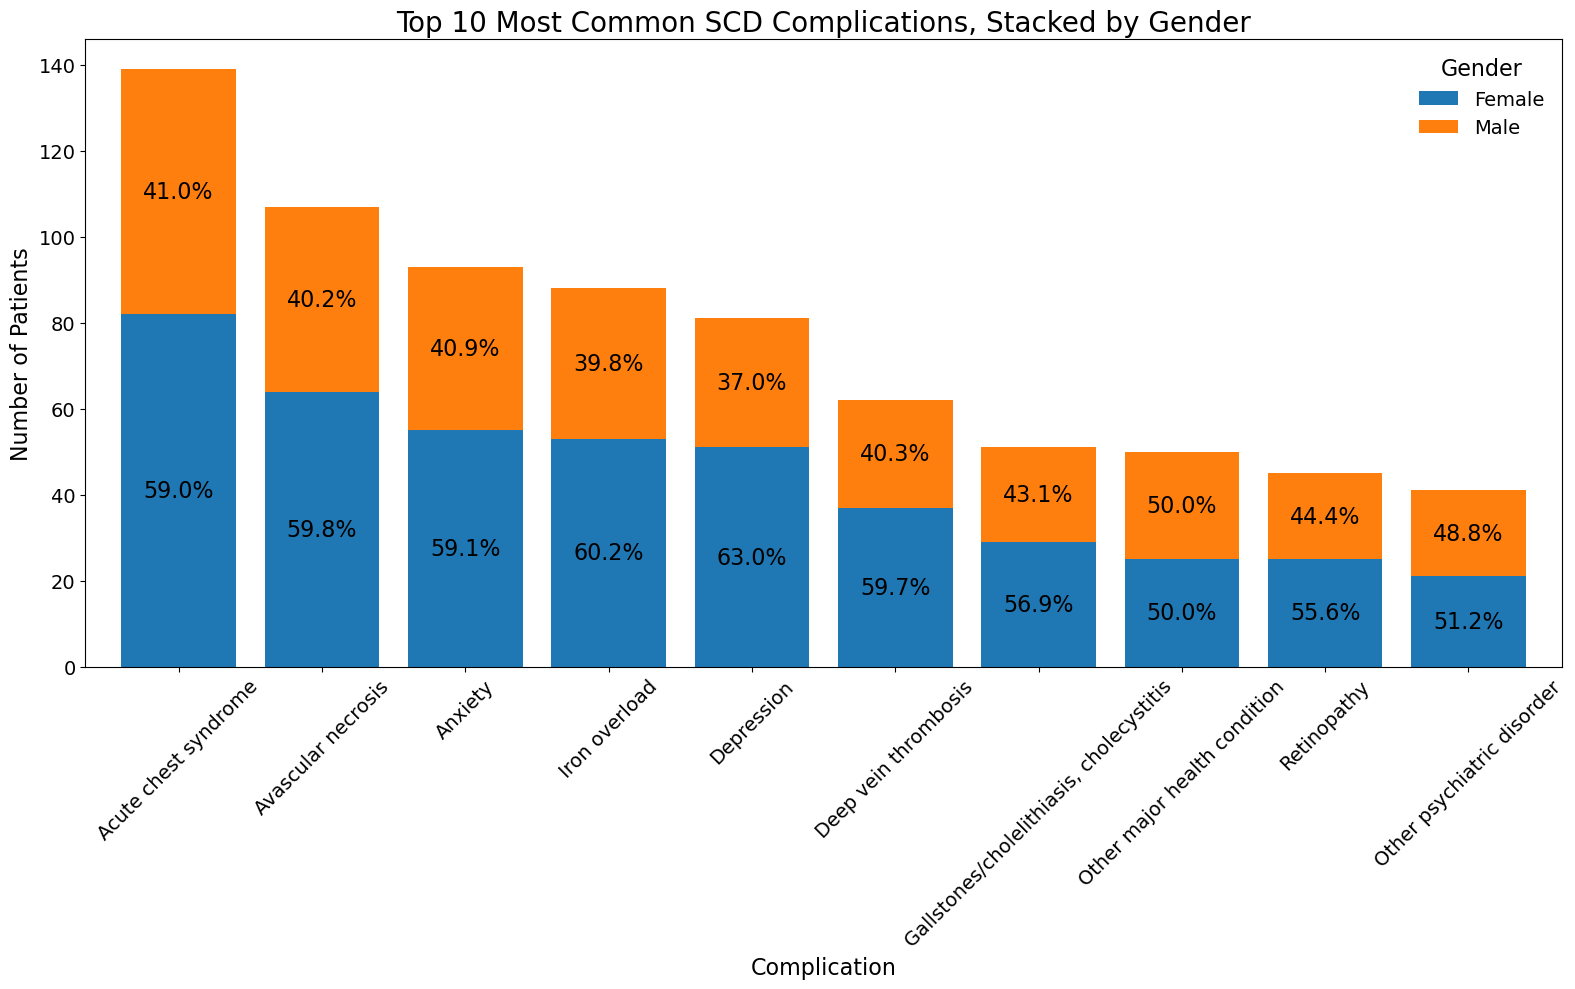

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Compute counts of “Yes” for each complication by gender
gender_counts = (
    df1[top10['Complication']]
    .eq('Yes')
    .groupby(df6['Sex'])
    .sum()
    .T
)

# 2) Compute totals per complication
totals = gender_counts.sum(axis=1)

# 3) Choose colors for each gender
genders = gender_counts.columns.tolist()
cmap = plt.get_cmap('tab10')
gender_colors = [cmap(i) for i in range(len(genders))]

# 4) Plot stacked bar chart on a larger canvas
fig, ax = plt.subplots(figsize=(16, 10))
gender_counts.plot(
    kind='bar',
    stacked=True,
    color=gender_colors,
    edgecolor='none',
    ax=ax,
    width=0.8
)

# 5) Annotate each segment with its % of the bar, vertical and in black
for i, comp in enumerate(gender_counts.index):
    bottom = 0
    for gender in genders:
        count = gender_counts.loc[comp, gender]
        pct = count / totals.loc[comp] * 100
        ax.text(
            x=i,
            y=bottom + count / 2,
            s=f"{pct:.1f}%",
            ha='center',
            va='center',
            fontsize=16,
            color='black',
            rotation=0    # vertical orientation
        )
        bottom += count

# 6) Final formatting with legend inside the plot
ax.set_title(
    'Top 10 Most Common SCD Complications, Stacked by Gender',
    fontsize=20
)
ax.set_xlabel('Complication', fontsize=16)
ax.set_ylabel('Number of Patients', fontsize=16)
ax.tick_params(axis='x', rotation=45, labelsize=14)
ax.tick_params(axis='y', labelsize=14)

# Place legend inside at top-right corner of the axes
ax.legend(
    title='Gender',
    loc='upper right',
    fontsize=14,
    title_fontsize=16,
    frameon=False
)

plt.tight_layout()
plt.show()


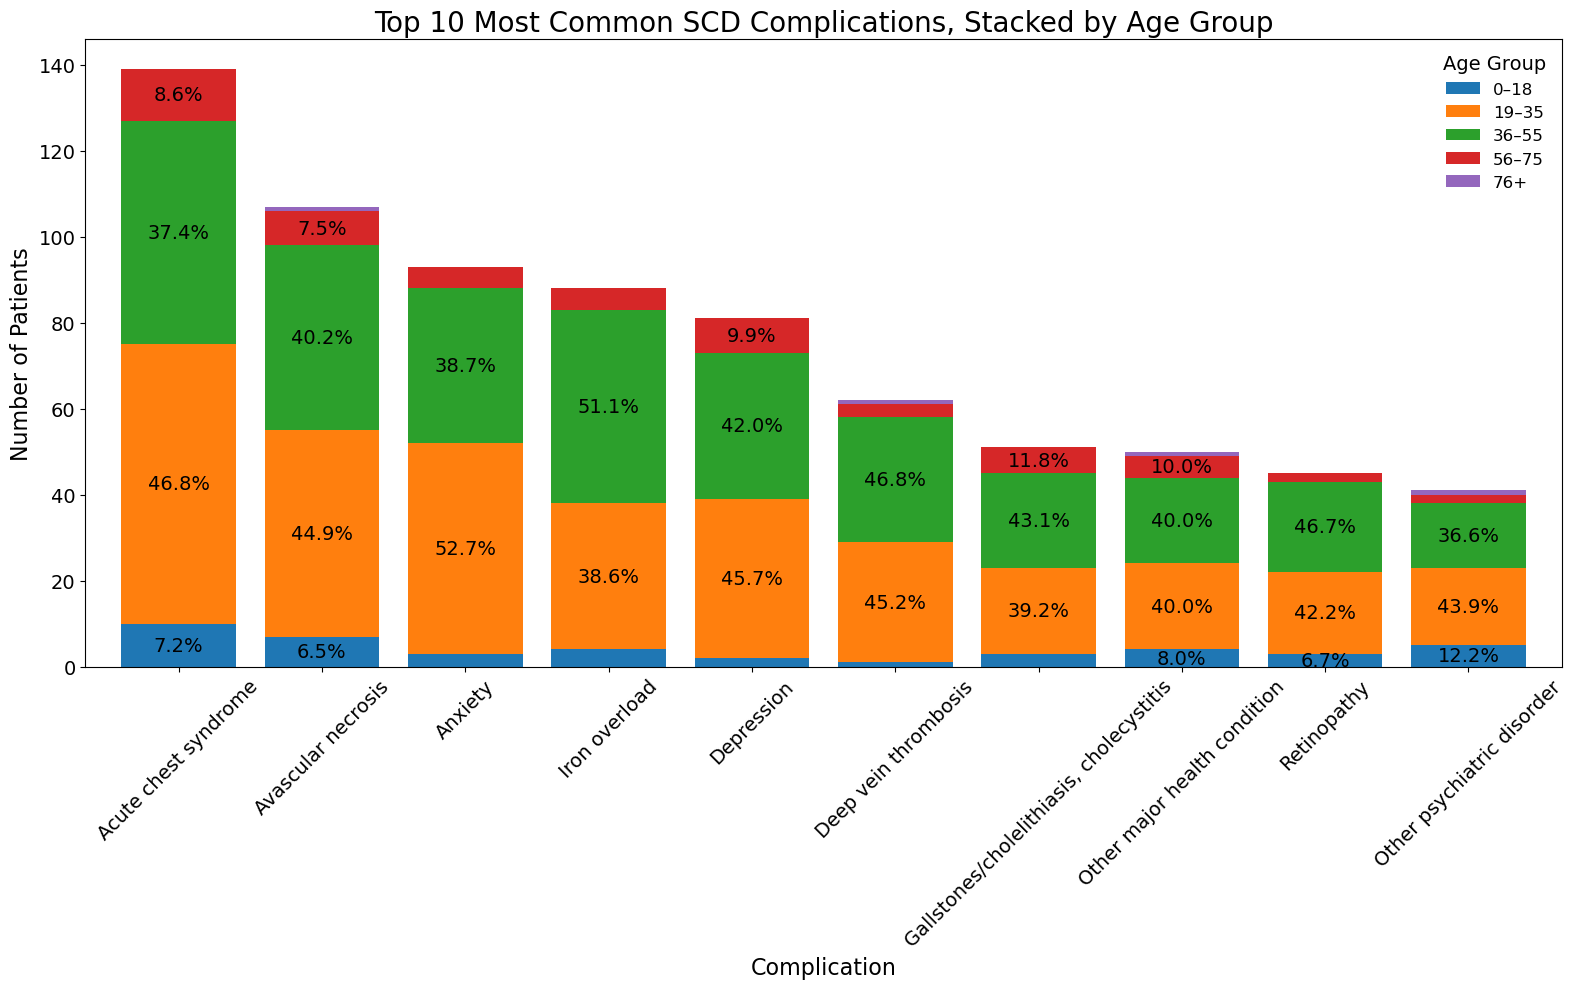

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Compute counts of “Yes” for each complication by age group
age_counts = (
    df1[top10['Complication']]
    .eq('Yes')
    .groupby(df6['Age Group'])   # make sure to group by df1
    .sum()
    .T
)

# 2) Compute totals per complication
totals = age_counts.sum(axis=1)

# 3) Prepare colors for each age group
age_groups = age_counts.columns.tolist()
cmap = plt.get_cmap('tab10')
age_colors = [cmap(i) for i in range(len(age_groups))]

# 4) Plot stacked bar chart on a larger canvas with increased bar width
fig, ax = plt.subplots(figsize=(16, 10))
age_counts.plot(
    kind='bar',
    stacked=True,
    color=age_colors,
    edgecolor='none',
    ax=ax,
    width=0.8
)

# 5) Annotate segments with % of the bar, only if >= 6.5%, horizontal and in black
for i, comp in enumerate(age_counts.index):
    bottom = 0
    for grp in age_groups:
        count = age_counts.loc[comp, grp]
        pct = count / totals.loc[comp] * 100
        if pct >= 6.5:
            ax.text(
                x=i,
                y=bottom + count / 2,
                s=f"{pct:.1f}%",
                ha='center',
                va='center',
                fontsize=14,
                color='black',
                rotation=0
            )
        bottom += count

# 6) Final formatting with legend inside
ax.set_title(
    'Top 10 Most Common SCD Complications, Stacked by Age Group',
    fontsize=20
)
ax.set_xlabel('Complication', fontsize=16)
ax.set_ylabel('Number of Patients', fontsize=16)
ax.tick_params(axis='x', rotation=45, labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.legend(
    title='Age Group',
    loc='upper right',
    fontsize=12,
    title_fontsize=14,
    frameon=False
)
plt.tight_layout()
plt.show()


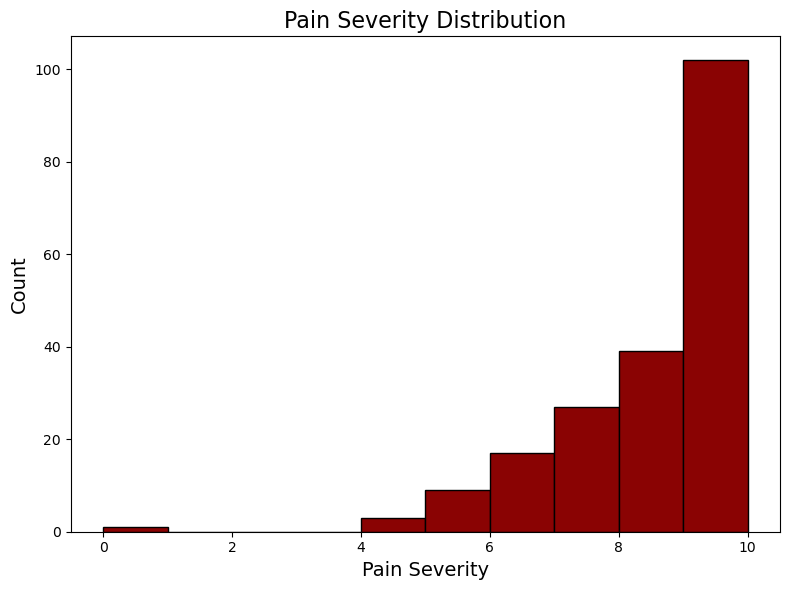

In [163]:
import matplotlib.pyplot as plt

# 1. Pain Severity Distribution (blood‐red bars, no grid)
plt.figure(figsize=(8, 6))
plt.hist(
    df6['Pain Severity'].dropna(),
    bins=10,
    color='#8A0303',     # blood-red color
    edgecolor='black'
)
plt.title('Pain Severity Distribution', fontsize=16)
plt.xlabel('Pain Severity', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(False)         # remove grid lines
plt.tight_layout()
plt.show()


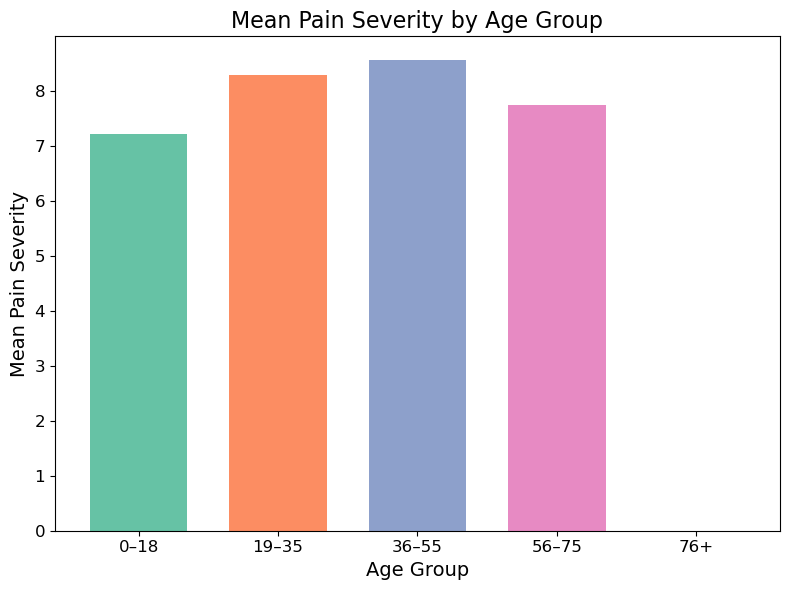

In [165]:
import matplotlib.pyplot as plt

# Compute mean pain by age group
mean_by_age = df6.groupby('Age Group')['Pain Severity'].mean()

# Choose distinct colors for each category
cmap = plt.get_cmap('Set2')
colors = [cmap(i) for i in range(len(mean_by_age))]

plt.figure(figsize=(8, 6))
mean_by_age.plot(
    kind='bar',
    color=colors,
    width=0.7  # increase bar width (default is ~0.8)
)

plt.title('Mean Pain Severity by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Mean Pain Severity', fontsize=14)

# Make x-axis labels horizontal
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()



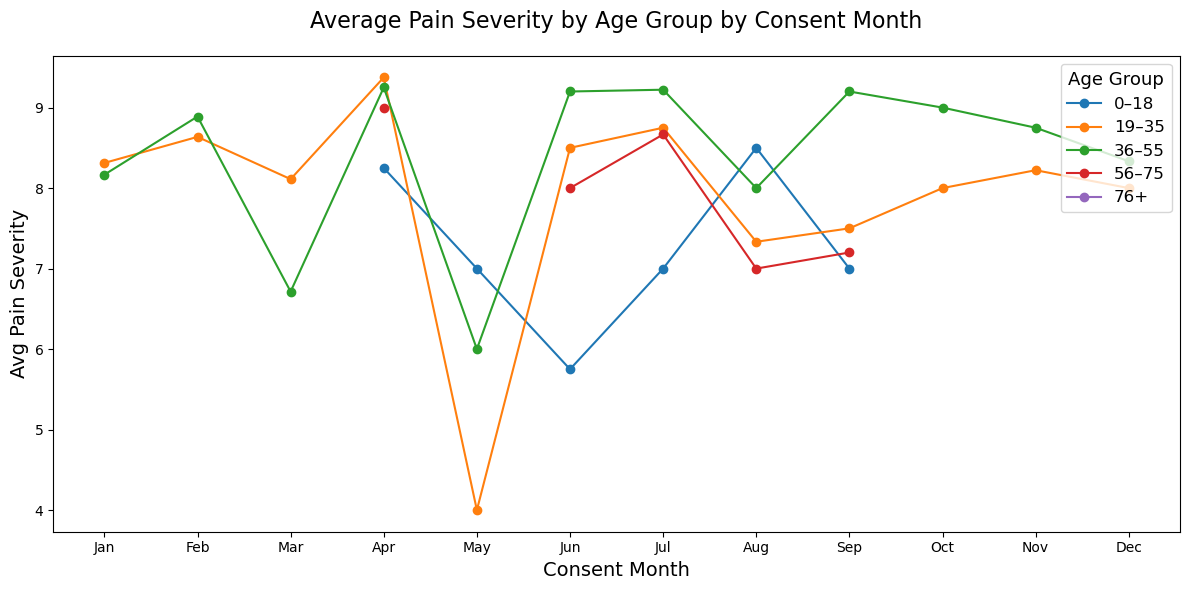

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 0) Load df6 and ensure 'Consent Date' is datetime
df6['Consent Date'] = pd.to_datetime(df6['Consent Date'], errors='coerce')

# 1) Extract month abbreviation from Consent Date
df6['Consent_Month'] = df6['Consent Date'] \
    .dt.month_name().str.slice(stop=3)
months_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df6['Consent_Month'] = pd.Categorical(
    df6['Consent_Month'],
    categories=months_order,
    ordered=True
)

# 2) Compute average pain severity by Consent_Month × Age Group
monthly_pain = (
    df6
    .groupby(['Consent_Month','Age Group'])['Pain Severity']
    .mean()
    .unstack()
    .reindex(months_order)   # ensure correct month order
)

# 3a) Line plot of avg pain by month for each age group
fig, ax = plt.subplots(figsize=(12, 6))
for age_grp in monthly_pain.columns:
    ax.plot(
        monthly_pain.index,
        monthly_pain[age_grp],
        marker='o',
        label=age_grp
    )
ax.set_xlabel('Consent Month', fontsize=14)
ax.set_ylabel('Avg Pain Severity', fontsize=14)
ax.set_title('Average Pain Severity by Age Group by Consent Month', fontsize=16, pad=20)
ax.legend(title='Age Group', fontsize=12, title_fontsize=13, loc='upper right')
plt.tight_layout()
plt.show()

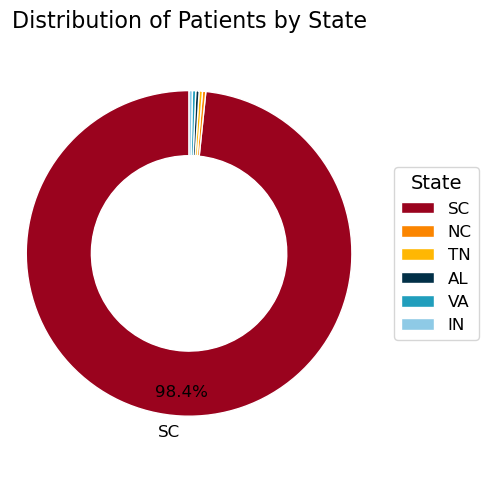

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Compute state counts
state_counts = df6['State'].value_counts()

# Function to filter out small percentages
def autopct_filter(pct):
    return f'{pct:.1f}%' if pct >= 10 else ''

# Only show 'SC' as a direct slice label; others blank
slice_labels = [state if state == 'SC' else '' for state in state_counts.index]

# Build a color list: SC first, then the other five in your specified order
other_colors = ['#fb8500', '#ffb703', '#023047', '#219ebc', '#8ecae6']
colors = []
j = 0
for state in state_counts.index:
    if state == 'SC':
        colors.append('#9a031e')
    else:
        colors.append(other_colors[j])
        j += 1

# Plot donut chart with custom colors
fig, ax = plt.subplots(figsize=(5, 5))
wedges, texts, autotexts = ax.pie(
    state_counts,
    labels=slice_labels,
    colors=colors,              # use our custom palette
    autopct=autopct_filter,
    startangle=90,
    pctdistance=0.85,
    wedgeprops={'width': 0.4, 'edgecolor': 'white'},
    textprops={'fontsize': 12, 'color': 'black'}
)

# Draw center circle for the donut hole
centre_circle = plt.Circle((0, 0), 0.60, fc='white', linewidth=0)
ax.add_artist(centre_circle)

ax.axis('equal')

# Legend outside showing all states
ax.legend(
    wedges,
    state_counts.index,
    title='State',
    loc='center left',
    bbox_to_anchor=(1.05, 0.5),
    fontsize=12,
    title_fontsize=14
)

plt.title('Distribution of Patients by State', fontsize=16)
plt.tight_layout()
plt.show()


In [73]:
!pip install geopandas

In [74]:
import geopandas as gpd
print(gpd.__version__)


1.0.1


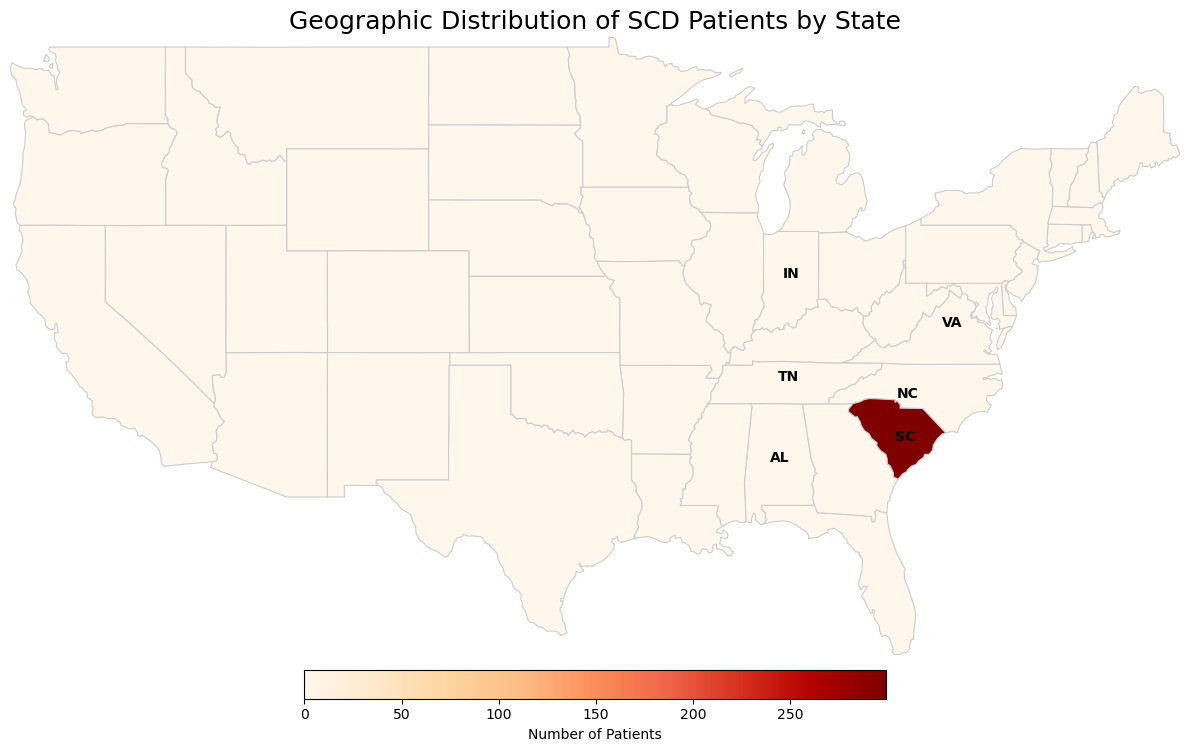

In [75]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# 1) Count patients by state
state_counts = df6['State'].value_counts().reset_index()
state_counts.columns = ['abbr', 'counts']

# 2) Map abbreviations → full names
abbr_to_name = {
    'SC': 'South Carolina',
    'NC': 'North Carolina',
    'TN': 'Tennessee',
    'AL': 'Alabama',
    'VA': 'Virginia',
    'IN': 'Indiana'
}
state_counts['name'] = state_counts['abbr'].map(abbr_to_name)

# 3) Load US states boundaries
states = gpd.read_file(
    'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json'
)

# 4) Merge counts into the GeoDataFrame
merged = states.merge(state_counts, on='name', how='left').fillna({'counts': 0})

# 5) Exclude Alaska, Hawaii, and Puerto Rico
contig = merged[~merged['name'].isin(['Alaska', 'Hawaii', 'Puerto Rico'])]

# 6) Plot choropleth with horizontal colorbar at bottom
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
contig.plot(
    column='counts',
    cmap='OrRd',
    linewidth=0.8,
    edgecolor='0.8',
    legend=True,
    legend_kwds={
        'label': "Number of Patients",
        'orientation': 'horizontal',
        'fraction': 0.04,
        'pad': 0.02
    },
    ax=ax
)

# 7) Annotate only the specified states
highlight = ['SC', 'NC', 'TN', 'AL', 'VA', 'IN']
for _, row in contig[contig['abbr'].isin(highlight)].iterrows():
    pt = row['geometry'].representative_point()
    ax.text(
        pt.x, pt.y, row['abbr'],
        horizontalalignment='center',
        fontsize=10,
        fontweight='bold',
        color='black'
    )

# 8) Zoom to the contiguous US only
minx, miny, maxx, maxy = contig.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

# 9) Final touches
ax.set_title('Geographic Distribution of SCD Patients by State', fontsize=18)
ax.axis('off')
plt.tight_layout()
plt.show()


In [76]:
df6.columns

Index(['Subject ID', 'Date of Birth', 'Sex', 'Zip code', 'Consent Date', 'Age',
       'Age Group', 'State', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'TAVG',
       'TMAX', 'TMIN', 'Acute chest syndrome', 'Avascular necrosis', 'Anxiety',
       'Iron overload', 'Depression', 'Deep vein thrombosis',
       'Gallstones/cholelithiasis, cholecystitis',
       'Other major health condition', 'Retinopathy',
       'Other psychiatric disorder', 'Pain Severity', 'Pain Frequency',
       'Pain Category'],
      dtype='object')

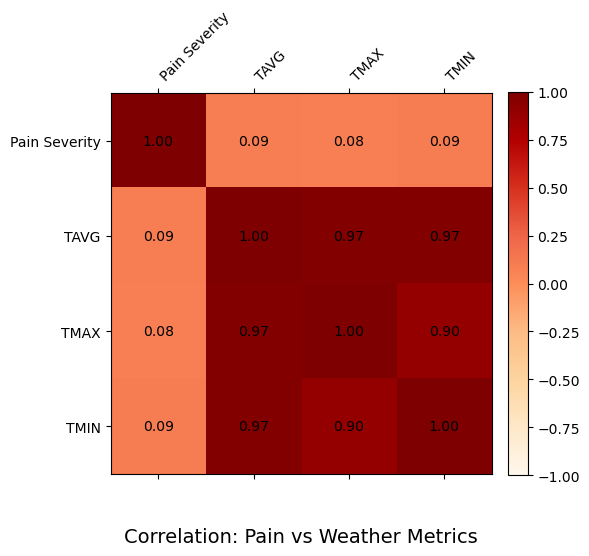

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Columns to include in the correlation
corr_cols = ['Pain Severity', 'TAVG', 'TMAX', 'TMIN']
corr = df6[corr_cols].corr()

fig, ax = plt.subplots(figsize=(6, 6))

# Plot heatmap with OrRd colormap
cax = ax.matshow(corr, cmap='OrRd', vmin=-1, vmax=1)
fig.colorbar(cax, fraction=0.046, pad=0.04)

# Set axis ticks and labels
ax.set_xticks(range(len(corr_cols)))
ax.set_xticklabels(corr_cols, rotation=45, ha='left')
ax.set_yticks(range(len(corr_cols)))
ax.set_yticklabels(corr_cols)

# Annotate each cell with the correlation value
for (i, j), val in np.ndenumerate(corr.values):
    ax.text(j, i, f"{val:.2f}", ha='center', va='center', color='black')

# Place the title below the plot
ax.set_title(
    'Correlation: Pain vs Weather Metrics',
    fontsize=14,
    y=-0.2  # negative y moves it below the axes
)

plt.tight_layout()
plt.show()


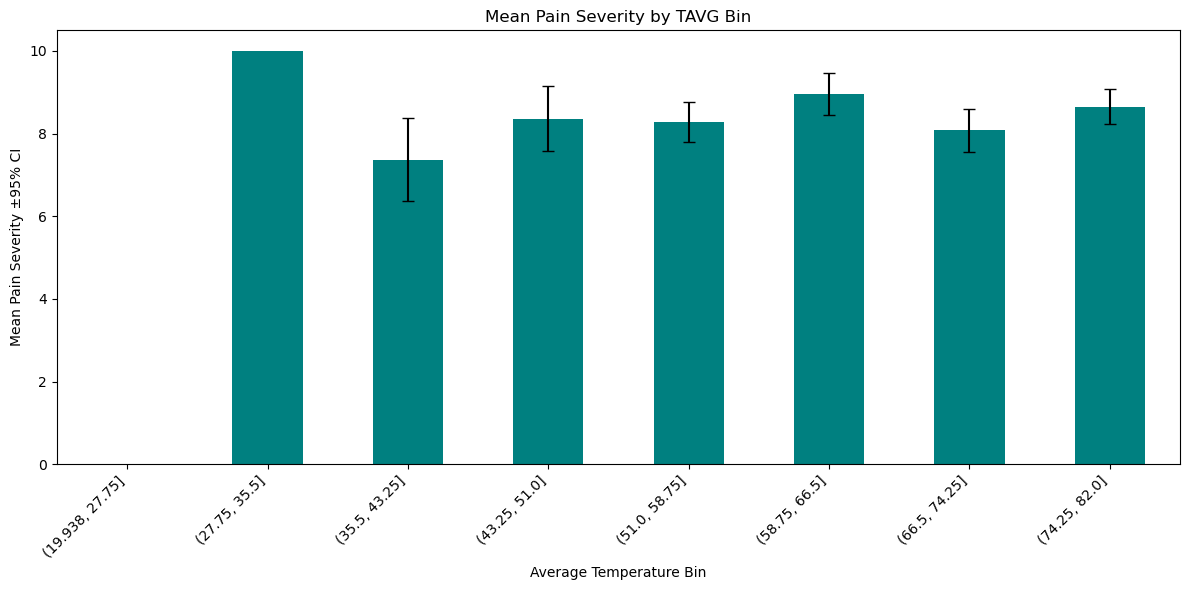

In [78]:
# Bin TAVG into 8 equal‐width buckets, compute mean pain
df6['TAVG_bin'] = pd.cut(df6['TAVG'], bins=8)
mean_pain = df6.groupby('TAVG_bin')['Pain Severity'].agg(['mean','count'])

plt.figure(figsize=(12,6))
mean_pain['mean'].plot(
    kind='bar',
    yerr=1.96 * (df6.groupby('TAVG_bin')['Pain Severity'].std() / 
                 np.sqrt(df6.groupby('TAVG_bin')['Pain Severity'].count())),
    capsize=4,
    color='teal'
)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Average Temperature Bin')
plt.ylabel('Mean Pain Severity ±95% CI')
plt.title('Mean Pain Severity by TAVG Bin')
plt.tight_layout()
plt.show()
